In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import datetime
from glob import glob

In [3]:
out_files = glob('../energy_consumption/output/idle/*.out'); out_files

['../energy_consumption/output/idle\\full_setup.out',
 '../energy_consumption/output/idle\\no_setup.out',
 '../energy_consumption/output/idle\\only_arduino.out',
 '../energy_consumption/output/idle\\only_picam.out']

../energy_consumption/output/idle\full_setup.out
363.55725190839695
../energy_consumption/output/idle\no_setup.out
258.55725190839695
../energy_consumption/output/idle\only_arduino.out
361.4961832061069
../energy_consumption/output/idle\only_picam.out
258.3435114503817


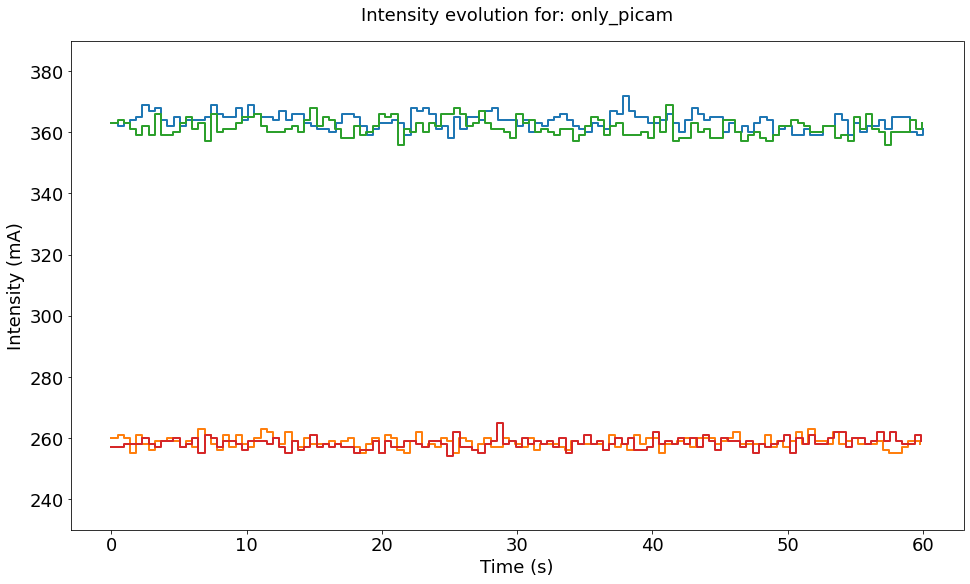

In [10]:
# Plot
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
# axes_labels_font.set_size(25)

for out_file in out_files:
    print(out_file)
    # Only git pull
    # if 'compare_img_size_v2.out' not in out_file:
    #     continue

    task_name = out_file.split('\\')[-1].split('.out')[0]

    # Data
    df = pd.read_csv(out_file)
    df['timestamp'] = df['time'].apply(lambda t: datetime.datetime.strptime(t, "%Y-%m-%d %H:%M:%S.%f").timestamp())
    df['timestamp'] = df['timestamp'] - min(df['timestamp'])
    print(df['current'].mean())

    ax.step(df['timestamp'], df['current'], linewidth=2, where='post', zorder=6)

    plt.ylim(230, 390)
    plt.xlabel('Time (s)', fontsize=18)
    plt.ylabel('Intensity (mA)', fontsize=18)
    plt.title(f'Intensity evolution for: {task_name}', fontsize=18, pad=20)
    for label in ax.get_yticklabels() + ax.get_xticklabels():
        label.set_fontsize(18)

In [ ]:



    fig.savefig(f'energy_consumption/plot/{task_name}_consumption.png', dpi=200)
plt.close(fig)

